# Modelos de mezclas Gaussianas

Se usa para 

Usa algoritmos como: 
1. EM: Expetation Maximizatio
2. MAP: Maximium A-posteriorï

Además trabaja bajo XT*X = U sum Vt

La evidencia y la prod apriori 

la verosimilitud hacemas EM

la A-posteriori haacemos  MAP 

Los modelos gausianos son parametricos, y utilizan una funcion la de Px, nadie la cambia

Se dice que los valores se agrupan sobre la media
 * numero de muestras = 30-50  para q funcione bn
 * poblaciones heterogeneas: modelar ciertos grupos con caracteristicas parecidas pero diferentes entre ellas 
 * Poblaciones homogeneas: 



In [5]:
# importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches # es para hacer elipses
from sklearn import datasets
from sklearn.mixture import GMM #mixture contiene los modelos de mezclas
from sklearn.cross_validation import StratifiedKFold #validación por K-folds



C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# cargamos los datos
iris = datasets.load_iris()

#realizamos las particiones de los datos para entrenamiento y validacion 80/20
indices = StratifiedKFold(iris.target, n_folds = 5)

#objetos iterables para sacar los indices
train_index,test_index = next(iter(indices))

#extraer los datos del contenido de iris
X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

#calculamos el número de clases
numero_clases = len(np.unique(y_train))


In [26]:
# Construir el clasificador GMM
clasificador = GMM(n_components = numero_clases, covariance_type = 'full', init_params = 'w', n_iter = 20)
clasificador.means_ = np.array([X_train[y_train==i].mean(axis=0)for i in range(numero_clases)])
print(clasificador.means_)
#Entrenamos con fit
clasificador.fit(X_train)



[[ 5.0425  3.445   1.4675  0.25  ]
 [ 5.895   2.745   4.2325  1.3125]
 [ 6.5925  2.9825  5.4975  2.0225]]


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: Deprecat

GMM(covariance_type='full', init_params='w', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, tol=0.001,
  verbose=0)

# Visualización 
****

El acierto de entrenamiento es del  87.5 %
El acierto de entrenamiento es del  86.6666666667 %


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


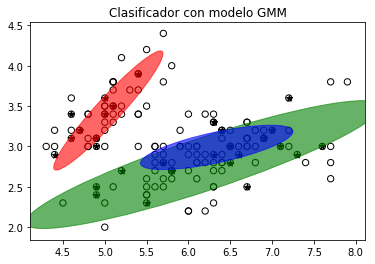

In [29]:
plt.figure()
colores = 'rgb'
for i,color in enumerate(colores):
    #calculamos los valores y vectores propios de las matrices propios de covarianza de 
    eigenvalores,eigenvectores = np.linalg.eigh(clasificador._get_covars()[i][:2,:2])
    # escalamos el primer vector propio para que quede con norma unitaria
    norm_vec = eigenvectores[0]/np.linalg.norm(eigenvectores[0])
    #calculamos el angulo de rotación de las elipses
    angulo = np.arctan2(norm_vec[1],norm_vec[0])
    angulo = 180 * angulo/ np.pi
    #escalamos con estética
    factor = 8
    eigenvalores *= factor
    #graficamos las elipses
    elipses = patches.Ellipse(clasificador.means_[i,:2], eigenvalores[0], eigenvalores[1], 180+ angulo , color = color) 
    axis_handle = plt.subplot(1,1,1) # handle del eje
    elipses.set_clip_box(axis_handle.bbox) # asociación de las cajas de dibujo
    elipses.set_alpha(0.6) #grado de transparencia 
    axis_handle.add_artist(elipses)
    
#graficamos los datos 
colores = 'bgr'
for i,color in enumerate(colores):
    data = iris.data[iris.target == i]
    plt.scatter(data[:,0],data[:,1],marker = 'o',facecolors ='none', edgecolors = 'black',s=40,label = iris.target_names[i])
    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0],test_data[:,1], marker = '*', facecolors = 'black', edgecolors = 'black', s =40,label = iris.target_names[i])
    
    
y_train_predict = clasificador.predict(X_train)
acc_train = np.mean(y_train_predict.ravel() == y_train.ravel())*100
print('El acierto de entrenamiento es del ',acc_train,'%')

y_test_predict = clasificador.predict(X_test)
acc_test = np.mean(y_test_predict.ravel() == y_test.ravel())*100
print('El acierto de entrenamiento es del ',acc_test,'%')

plt.title('Clasificador con modelo GMM')
plt.xticks()
plt.yticks()
plt.show()